In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torch.cuda

torch.cuda.set_device(1)

In [3]:
from fastai.vision import *
from fastai.metrics import error_rate 
from pathlib import Path 

In [4]:
img_path = Path.cwd() / 'heat_maps' / 'heat_maps'
data = ImageDataBunch.from_folder(img_path, valid_pct = .5, classes=['ddos_tcp', 'clean_tcp'], bs=64)

407040

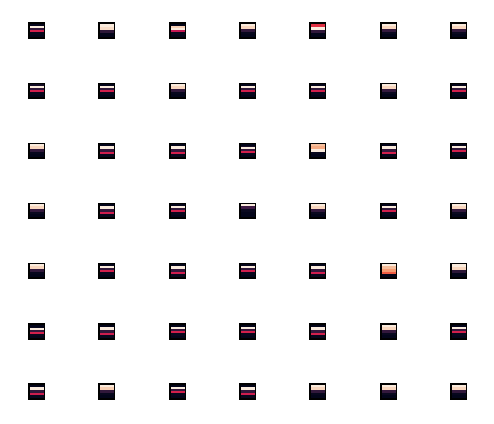

In [5]:
data.show_batch(rows=7, figsize=(7,6))
torch.cuda.max_memory_allocated()

In [6]:
print(data.classes)
len(data.classes), data.c

['ddos_tcp', 'clean_tcp']


(2, 2)

In [7]:
learn = create_cnn(data, models.squeezenet1_1, metrics=error_rate)

/home/SGF.EDUBEAR.NET/eam96/.conda/envs/eric/lib/python3.7/site-packages/torchvision/models/squeezenet.py:94: UserWarning: nn.init.kaiming_uniform is now deprecated in favor of nn.init.kaiming_uniform_.
  init.kaiming_uniform(m.weight.data)
/home/SGF.EDUBEAR.NET/eam96/.conda/envs/eric/lib/python3.7/site-packages/torchvision/models/squeezenet.py:92: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
  init.normal(m.weight.data, mean=0.0, std=0.01)


In [8]:
learn.model

Sequential(
  (0): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2))
      (1): ReLU(inplace)
      (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
      (3): Fire(
        (squeeze): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): ReLU(inplace)
      )
      (4): Fire(
        (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
        (squeeze_activation): ReLU(inplace)
        (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
        (expand1x1_activation): ReLU(inplace)
        (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (expand3x3_activation): ReLU(inplace)
      )
 

In [0]:
learn.fit_one_cycle(10)

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [0]:
interp.plot_top_losses(9, figsize=(15, 11))

In [0]:
doc(interp.plot_multi_top_losses)

In [0]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [0]:
interp.most_confused(min_val=1)